In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.preprocessing.text import Tokenizer

In [16]:
pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 5.3 MB/s 
     |████████████████████████████████| 1.4 MB 52.7 MB/s 
     |████████████████████████████████| 233 kB 43.7 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=52da1ff9410221e7ec9a26a9ae6283c567a10ff3b748efeed4e93fd721d9e369
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=155070 sha256=435f17173dd4eb9487eee0e697585ce11ba3482f62481714463c22b530e356ae
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


## Input datasets
I read from 5 datasets and combine them toghether

because of the datasets fault, I can't separate them in file reading time, so I read it as a 1 column

In [2]:
csv1 = pd.read_csv("/content/drive/MyDrive/NerDatas/Persian-NER-part1.txt", header=None, delimiter="~", names = ['All'], encoding_errors = 'ignore', low_memory=False)
csv2 = pd.read_csv("/content/drive/MyDrive/NerDatas/Persian-NER-part2.txt", header=None, delimiter="~", names = ['All'], encoding_errors = 'ignore', low_memory=False)
csv3 = pd.read_csv("/content/drive/MyDrive/NerDatas/Persian-NER-part3.txt", header=None, delimiter="~", names = ['All'], encoding_errors = 'ignore', low_memory=False)
csv4 = pd.read_csv("/content/drive/MyDrive/NerDatas/Persian-NER-part4.txt", header=None, delimiter="~", names = ['All'], encoding_errors = 'ignore', low_memory=False)
#csv5 = pd.read_csv("/content/drive/MyDrive/NerDatas/Persian-NER-part5.txt", header=None, delimiter="~", names = ['All'], encoding_errors = 'ignore', low_memory=False)

In [3]:
mainCsv = pd.DataFrame(columns=['All'])
mainCsv = mainCsv.append(csv1, ignore_index=True)
mainCsv = mainCsv.append(csv2, ignore_index=True)
mainCsv = mainCsv.append(csv3, ignore_index=True)
mainCsv = mainCsv.append(csv4, ignore_index=True)
#data = data.append(csv5, ignore_index=True)
mainCsv

,All
0,ویکی‌پدیای\tO
1,انگلیسی\tO
2,در\tB-DAT
3,تاریخ\tI-DAT
4,۱۵\tI-DAT
...,...
10527407,روی\tO
10527408,میز\tO
10527409,گزارشگران\tO
10527410,کوبیدند\tO


In [4]:
tmp = mainCsv['All'].str.rsplit("\t", 1)
dataWord = pd.DataFrame(list(tmp), columns = ['Token', 'NameEntity'])
dataWord

,Token,NameEntity
0,ویکی‌پدیای,O
1,انگلیسی,O
2,در,B-DAT
3,تاریخ,I-DAT
4,۱۵,I-DAT
...,...,...
10527407,روی,O
10527408,میز,O
10527409,گزارشگران,O
10527410,کوبیدند,O


(-1.1092184466388482,
 1.1053164707312142,
 -1.113376548333124,
 1.1006369901305748)

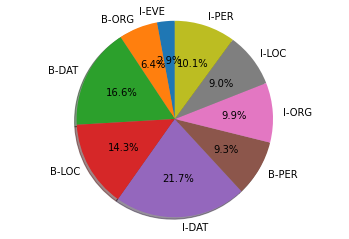

In [5]:
x = dataWord['NameEntity'].value_counts()[1:-1]
x = shuffle(x)
fig1, ax1 = plt.subplots()
ax1.pie(x.values, labels=x.keys(), autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 

In [6]:
dataWord['NameEntity'].value_counts()

O        8728635
I-DAT     383590
B-DAT     294479
B-LOC     252790
I-PER     178051
I-ORG     174526
B-PER     164234
I-LOC     158827
B-ORG     113397
I-EVE      51561
B-EVE      27310
Name: NameEntity, dtype: int64

In [7]:
nanIndices = dataWord['NameEntity'][dataWord['NameEntity'].isnull().values].index
nanIndices

Int64Index([ 1193638,  2569124,  2613297,  5508457,  7587616,  8104097,
             8265958,  8566774,  8709133,  8753008,  8968246, 10258056],
           dtype='int64')

In [8]:
dataWord.iloc[nanIndices]

,Token,NameEntity
1193638,http://turnbull.mcs.st-and.ac.uk/,None
2569124,http://kiau.ac.ir/,None
2613297,2,None
5508457,http://sharif.edu/,None
7587616,members.tripod.com/,None
8104097,http://www.rph.wa.gov.au/,None
8265958,http://sharif.edu/,None
8566774,http://web.eecs.umich.edu/,None
8709133,http://lisa.cs.duke.edu/,None
8753008,http://freepages.genealogy.rootsweb.ancestry.com/,None


In [9]:
dataWord = dataWord.dropna()
dataWord = dataWord.reset_index(drop = True)

In [10]:
dataWord.iloc[nanIndices]

,Token,NameEntity
1193638,در,O
2569124,کشور,B-LOC
2613297,ایران,B-LOC
5508457,رساله,O
7587616,زازاکی,O
8104097,وایلی,O
8265958,فرزند,O
8566774,مشورتی,O
8709133,هنوز,O
8753008,.,O


In [11]:
def makeSentences(dotIndices, data):
  columns = ['Text', 'Label']
  df= []
  begin = 0
  for i in range(len(dotIndices)-100):
    tmp = data.iloc[begin:dotIndices[i]]
    begin = dotIndices[i] + 1
    _list=[]
    _list.append(' '.join(list(tmp['Token'])))
    _list.append(' '.join(list(tmp['NameEntity'])))
    df.append(_list)
  df= pd.DataFrame(df,columns=list(columns))
  return df

In [12]:
dotIndices = list(dataWord['Token'][dataWord['Token'] == '.'].index)
dataSentences = makeSentences(dotIndices, dataWord)

In [13]:
dataSentences

,Text,Label
0,ویکی‌پدیای انگلیسی در تاریخ ۱۵ ژانویه ۲۰۰۱ ( م...,O O B-DAT I-DAT I-DAT I-DAT I-DAT O B-DAT O B-...
1,بنیان‌گذاران آن ، جیمی ولز و لری سنگر هستند,O O O B-PER I-PER O B-PER I-PER O
2,هم‌اکنون بنیاد غیرانتفاعی بنیاد ویکی‌مدیا پروژ...,O O O B-ORG I-ORG O O O O O
3,کارساز وب اصلی این وبگاه در شهر تامپا ی فلورید...,O O O O O O O B-LOC O B-LOC O
4,همچنین میزبان‌های اضافی دیگری هم در شهرهای آمس...,O O O O O O O B-LOC O B-LOC O O O O O
...,...,...
400226,چاقوی بافت که پس از بستن هر گره بر پرزهای گره ...,O O O O O O O O O O O O O O O O O O O O
400227,این فشردگی ردیفها به نیروی بافنده بستگی دارد و...,O O O O O O O O O O O O O O O O O O O O O O O ...
400228,هارمونی رنگها به ویژه رنگهای شاد در طیفهای تیر...,O O O O O O O O O O O O O O O O O O O O O O O ...
400229,قالیهای نفیسی از ایشان در معتبرترین موزه ‌های ...,O O O O O O O B-LOC I-LOC O O O O O O O O O O ...


In [14]:
dataSentences.iloc[[12345]]

,Text,Label
12345,به استثنای آنانی که پدربزرگان و مادربزرگان‌شان...,O O O O O O O O O B-DAT I-DAT I-DAT I-DAT O O ...


In [17]:
tmp = csv1['All'].str.rsplit("\t", 1)


In [18]:
data1 = pd.DataFrame(list(tmp), columns = ['Token', 'NameEntity'])

(-1.1062593001375844,
 1.1096653641921335,
 -1.110220512189305,
 1.1004866910566335)

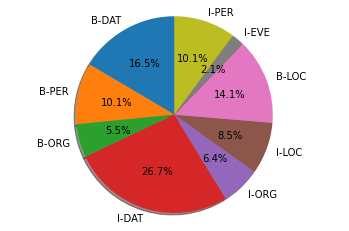

In [19]:
x = data1['NameEntity'].value_counts()[1:-1]
x = shuffle(x)
fig1, ax1 = plt.subplots()
ax1.pie(x.values, labels=x.keys(), autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 


In [20]:
data1['NameEntity'].isna().sum()

2

In [21]:
data1.tail()

,Token,NameEntity
2613292,و,O
2613293,خودروی,O
2613294,محورجلو,O
2613295,می‌باشد,O
2613296,.,O


In [22]:
nanIndices = data1['NameEntity'][data1['NameEntity'].isnull().values].index

In [23]:
data1.iloc[nanIndices]

,Token,NameEntity
1193638,http://turnbull.mcs.st-and.ac.uk/,None
2569124,http://kiau.ac.ir/,None


In [24]:
data1 = data1.dropna()
data1 = data1.reset_index(drop=True)

In [25]:
data1 = data1.fillna("O")

In [26]:
data1.iloc[nanIndices]

,Token,NameEntity
1193638,در,O
2569124,کشور,B-LOC


In [27]:
dotIndices = list(data1['Token'][data1['Token'] == '.'].index)

In [28]:
type(dotIndices)

list

In [30]:
def makeSentences(dotIndices, data):
  columns = ['Text', 'Label']
  df= []
  begin = 0
  for i in range(len(dotIndices)-100):
    tmp = data.iloc[begin:dotIndices[i]]
    begin = dotIndices[i] + 1
    _list=[]
    _list.append(' '.join(list(tmp['Token'])))
    _list.append(' '.join(list(tmp['NameEntity'])))
    df.append(_list)
  df= pd.DataFrame(df,columns=list(columns))
  return df

In [31]:
makeSentences(dotIndices, data1)

,Text,Label
0,ویکی‌پدیای انگلیسی در تاریخ ۱۵ ژانویه ۲۰۰۱ ( م...,O O B-DAT I-DAT I-DAT I-DAT I-DAT O B-DAT O B-...
1,بنیان‌گذاران آن ، جیمی ولز و لری سنگر هستند,O O O B-PER I-PER O B-PER I-PER O
2,هم‌اکنون بنیاد غیرانتفاعی بنیاد ویکی‌مدیا پروژ...,O O O B-ORG I-ORG O O O O O
3,کارساز وب اصلی این وبگاه در شهر تامپا ی فلورید...,O O O O O O O B-LOC O B-LOC O
4,همچنین میزبان‌های اضافی دیگری هم در شهرهای آمس...,O O O O O O O B-LOC O B-LOC O O O O O
...,...,...
98721,روز یکشنبه ۲۵ دی‌ماه ۱۳۹۰ ماموران امنیتی او را...,B-DAT I-DAT I-DAT O O O O O O O O O B-LOC O O ...
98722,او در تاریخ ۷ اسفند ۱۳۹۰ به قید وثیقه آزاد شد,O B-DAT I-DAT I-DAT I-DAT I-DAT O O O O O
98723,هنریک یوهان ایبسن ( زاده ۲۰ مارس ۱۸۲۸ در شین (...,O O O O O B-DAT I-DAT I-DAT O O O O O B-LOC B-...
98724,او یکی از بزرگ‌ترین استادان هنر تئاتر در تمامی...,O O O O O O O O O O O O O O B-PER O O


In [32]:
data1.iloc[[1193638]]

,Token,NameEntity
1193638,در,O


In [ ]:
csvTest = pd.read_csv("/content/drive/MyDrive/NerDatas/justTest.txt", header=None, delimiter="~", names = ['All'], encoding_errors = 'ignore', low_memory=False)
tmpTest = csvTest['All'].str.rsplit("\t", 1)
dataTest = pd.DataFrame(list(tmpTest), columns = ['Token', 'NameEntity'])
dataTest

In [ ]:
f = open("/content/drive/MyDrive/NerDatas/justTest.txt")
sentences = []
sentence = []
for line in f:
    if len(line) == 0 or line.startswith('-DOCSTART') or line[0] == "\n":
        if len(sentence) > 0:
            sentences.append(sentence)
            sentence = []
        continue
    splits = line.split('\t')        
    sentence.append([splits[0], splits[-1]])

sentences
        

In [ ]:
df= pd.DataFrame(columns=['Text', 'Label'])
for sentence in sentences:
  text=''
  words=[]
  values=[]
  for item in sentence:
    words.append(item[0])
    values.append(item[1].replace('\n',''))
  _list=[]
  _list.append(' '.join(words))
  _list.append(' '.join(values))
  df2 = pd.DataFrame([_list], columns=['Text', 'Label'])
  df=df.append(df2, ignore_index=True)
list(df.values)